# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [2]:
car_cols = ['mpg','cylinders','displacement','horsepower','weight','acceleration','modelYear','origin','carName']
cars_df = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',names= car_cols)
cars_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelYear,origin,carName
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,"""chevrolet impala"""
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,"""plymouth fury iii"""
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,"""pontiac catalina"""
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,"""amc ambassador dpl"""


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [3]:
## Description mentioned that horsepower column contains ? for some of the rows

## On performing info(), it is seen that horsepower column is an object datatype.
## Morover, Description on the dataframe doesn't display horsepower column, indicating it has to be converted to some numeric datatype
## 

In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
modelYear       398 non-null int64
origin          398 non-null int64
carName         398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
cars_df.shape

(398, 9)

In [6]:
cars_df[cars_df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelYear,origin,carName
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


In [7]:
cars_df.describe()

,mpg,cylinders,displacement,weight,acceleration,modelYear,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

In [8]:
horsepower = cars_df[np.logical_not(cars_df['horsepower']=='?')]['horsepower'].astype('float')
cars_df['horsepowerf'] = horsepower
cars_df[cars_df['horsepowerf'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelYear,origin,carName,horsepowerf
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto""",NaN
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick""",NaN
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe""",NaN
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra""",NaN
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i""",NaN
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl""",NaN


In [9]:
cars_df['horsepowerf'].fillna(cars_df[np.logical_not(cars_df['horsepowerf'].isna())]['horsepowerf'].median(),inplace=True)
cars_df[cars_df['horsepowerf'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelYear,origin,carName,horsepowerf


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

In [10]:
cars_df.corr()

,mpg,cylinders,displacement,weight,acceleration,modelYear,origin,horsepowerf
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450,-0.773453
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543,0.841284
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409,0.895778
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024,0.862442
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873,-0.686590
modelYear,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662,-0.413733
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000,-0.452096
horsepowerf,-0.773453,0.841284,0.895778,0.862442,-0.686590,-0.413733,-0.452096,1.000000


C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\senth\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\senth\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\senth\AIML\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


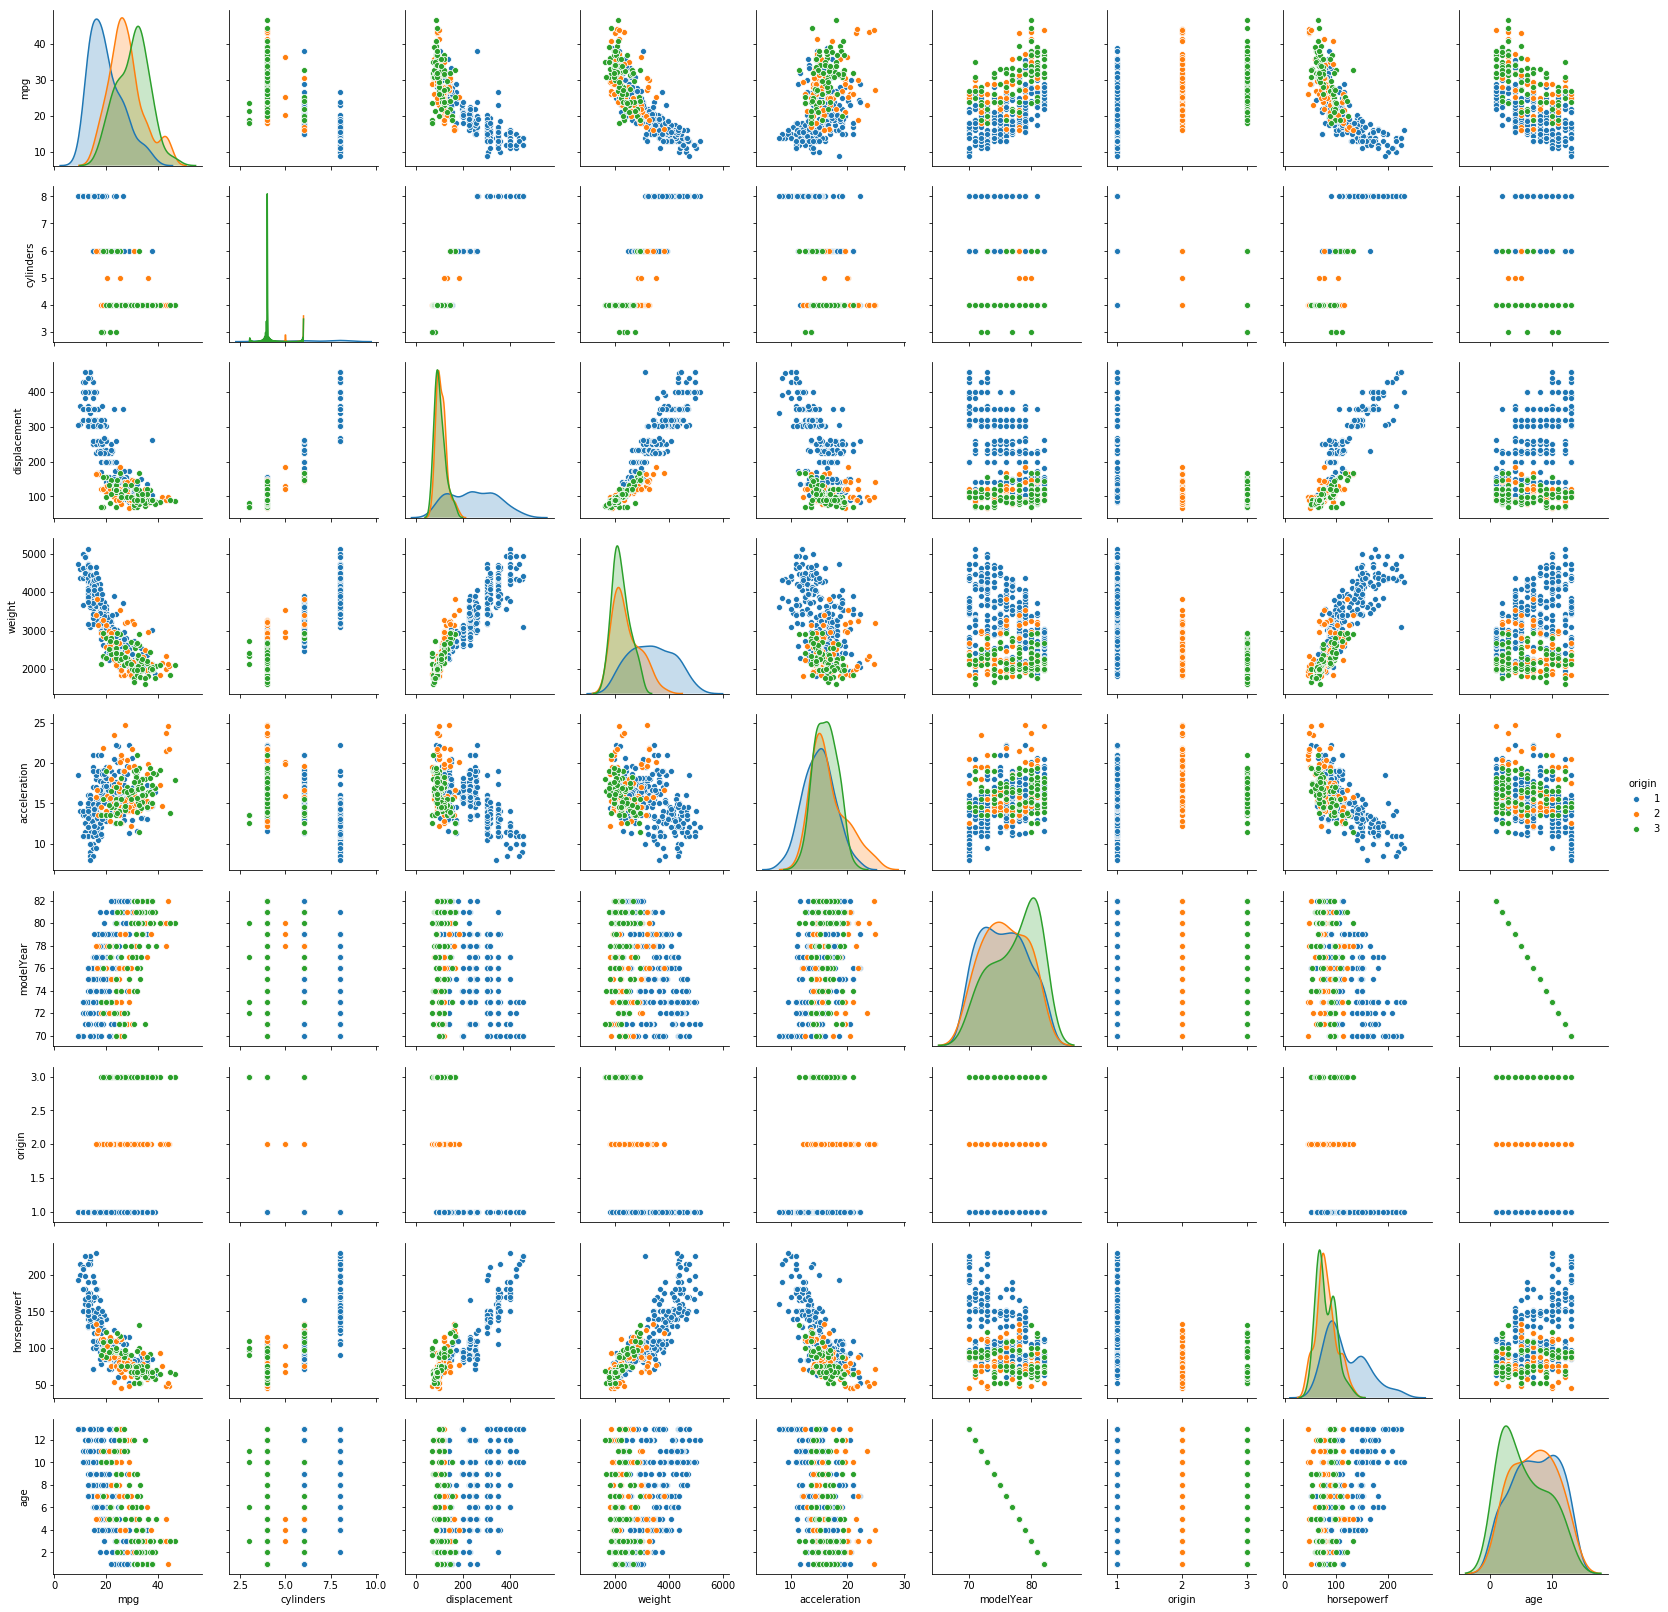

In [86]:
sns.pairplot(cars_df, hue='origin')

In [12]:
#Observations


# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [21]:
# Further dig into data shows max mpd is for 4 cylinders vehicles
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
         #subtract year from 83 to get the age

cars_df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [25]:
cars_df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [31]:
cars_df['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [39]:
col = ['cylinders','origin']
for colk in col:
    for k in cars_df[colk].unique():
        print('mpg for ',k,' - ',colk,' car is ',cars_df[cars_df[colk]==k]['mpg'].max())

mpg for  8  -  cylinders  car is  26.6
mpg for  4  -  cylinders  car is  46.6
mpg for  6  -  cylinders  car is  38.0
mpg for  3  -  cylinders  car is  23.7
mpg for  5  -  cylinders  car is  36.4
mpg for  1  -  origin  car is  39.0
mpg for  3  -  origin  car is  46.6
mpg for  2  -  origin  car is  44.3


In [41]:
cars_df['modelYear'].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: modelYear, dtype: int64

In [46]:
cars_df['age'] = 83-cars_df['modelYear']
cars_df.head()
cars_df['age'].value_counts()

10    40
5     36
7     34
1     31
8     30
13    29
4     29
3     29
2     29
12    28
11    28
6     28
9     27
Name: age, dtype: int64

# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [14]:
# Missing value check was done above and hp column was treated with median values
# Let us check for outliers now

In [49]:
cars_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'modelYear', 'origin', 'carName', 'horsepowerf', 'age'],
      dtype='object')

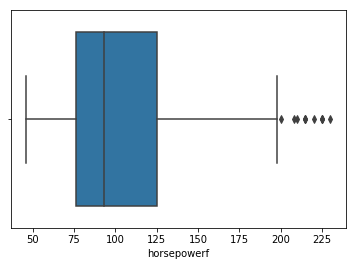

In [72]:
sns.boxplot(cars_df['horsepowerf'])

In [68]:
from scipy.stats import ttest_1samp
for col in cars_df.columns:
    if(np.logical_and(col != 'horsepower',col != 'carName')):
        print('ttest p-value for ',col, ' is ',ttest_1samp(cars_df[col], cars_df[col].mean()))

ttest p-value for  mpg  is  Ttest_1sampResult(statistic=-1.8136273681272493e-14, pvalue=0.9999999999999856)
ttest p-value for  cylinders  is  Ttest_1sampResult(statistic=0.0, pvalue=1.0)
ttest p-value for  displacement  is  Ttest_1sampResult(statistic=0.0, pvalue=1.0)
ttest p-value for  weight  is  Ttest_1sampResult(statistic=0.0, pvalue=1.0)
ttest p-value for  acceleration  is  Ttest_1sampResult(statistic=1.1565621682697274e-13, pvalue=0.9999999999999077)
ttest p-value for  modelYear  is  Ttest_1sampResult(statistic=0.0, pvalue=1.0)
ttest p-value for  origin  is  Ttest_1sampResult(statistic=0.0, pvalue=1.0)
ttest p-value for  horsepowerf  is  Ttest_1sampResult(statistic=0.0, pvalue=1.0)
ttest p-value for  age  is  Ttest_1sampResult(statistic=0.0, pvalue=1.0)


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR

X = cars_df[['cylinders','displacement','weight','acceleration','origin','horsepowerf','age']]
Y = cars_df['mpg']
lr = LinearRegression()
lr.fit(X,Y)
print(lr.score(X,Y))

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X,Y)
print(knn.score(X,Y))

nb = GaussianNB()
##nb.fit(X,Y)
##print(nb.score(X,Y))

svr = SVR()
svr.fit(X,Y)
print(svr.score(X,Y))

models = [lr,knn,svr]
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
for model in models:
    sfs1 = sfs(model, k_features=7, forward=True, scoring='r2', cv=10) ##- Forward selection
    sfs1.fit(X,Y)
    results=sfs1.get_metric_dict()
    print(pd.DataFrame(results).T)

0.8209467359784419
0.8161393785102266
0.1958990009844799
  avg_score  ci_bound                                          cv_scores  \
1  0.357732  0.377358  [0.4450521138868949, 0.5306255775713401, 0.075...   
2  0.624446    0.1995  [0.7190282830632596, 0.742705496219659, 0.5712...   
3  0.642554  0.181044  [0.724882760857144, 0.7719826040530678, 0.5968...   
4  0.644801  0.178205  [0.7420369260649264, 0.7722057802109827, 0.602...   
5  0.645774  0.181523  [0.7505273381094244, 0.7688908039534637, 0.608...   
6  0.637994  0.174295  [0.7211720698282982, 0.7627412060735435, 0.590...   
7  0.633153  0.174926  [0.678057257740651, 0.7664038920850321, 0.5878...   

             feature_idx                                      feature_names  \
1                   (2,)                                          (weight,)   
2                 (2, 6)                                      (weight, age)   
3              (2, 4, 6)                              (weight, origin, age)   
4           (1, 2,

# Q7. Create appropriate clusters with the new data set

In [112]:
from sklearn.cluster import KMeans
cluster_errors = []
clusters = np.arange(2,10)
for k in clusters:
    kmc = KMeans(n_clusters=k,random_state=1)
    kmc.fit(X,Y)
    print(kmc.cluster_centers_)
    print(kmc.inertia_)
    print(kmc.labels_)
    cluster_errors.append(kmc.inertia_)


[[7.23717949e+00 3.01653846e+02 3.87953205e+03 1.45416667e+01
  1.06410256e+00 1.37564103e+02 8.23717949e+00]
 [4.30578512e+00 1.23659091e+02 2.38438843e+03 1.62297521e+01
  1.90082645e+00 8.28636364e+01 6.18595041e+00]]
74278135.37562461
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 

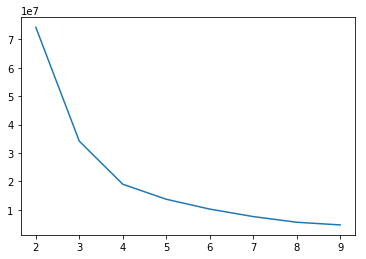

In [113]:
plt.plot(clusters,cluster_errors)

# Q8. Identify the appropriate clusters with result from above question

In [121]:
from sklearn.cluster import KMeans
cluster_errors = []
k=5
kmc = KMeans(n_clusters=k,random_state=1)
kmc.fit(X,Y)
print(kmc.cluster_centers_)
##print(kmc.inertia_)
##print(kmc.labels_)
##cluster_errors.append(kmc.inertia_)
##plt.plot(clusters,cluster_errors)

[[3.98550725e+00 9.82500000e+01 2.10455797e+03 1.66478261e+01
  2.15942029e+00 7.31992754e+01 6.38405797e+00]
 [7.54716981e+00 3.06452830e+02 3.87509434e+03 1.43301887e+01
  1.01886792e+00 1.36735849e+02 8.01886792e+00]
 [4.58064516e+00 1.47989247e+02 2.71986022e+03 1.55827957e+01
  1.62365591e+00 9.46881720e+01 5.83870968e+00]
 [8.00000000e+00 3.68833333e+02 4.49795833e+03 1.27916667e+01
  1.00000000e+00 1.74083333e+02 9.89583333e+00]
 [6.22727273e+00 2.38121212e+02 3.29653030e+03 1.63030303e+01
  1.13636364e+00 1.06098485e+02 6.93939394e+00]]


# Q9. Check for no of values in each cluster and centers for each variables. 

In [123]:
pd.Series(kmc.labels_).value_counts()

0    138
2     93
4     66
1     53
3     48
dtype: int64

# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

In [ ]:
cars_df['group'] = kmc.predict(X)
cars_df.head()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0CA1897B8>,
      dtype=object)

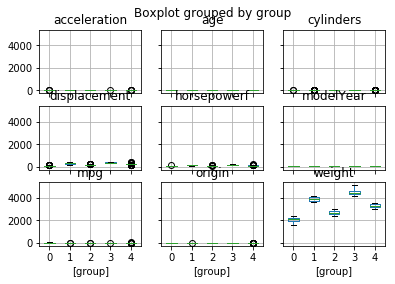

In [119]:
cars_df.boxplot(by='group')

In [15]:
# Export the data into csv for any further analysis

from pandas import ExcelWriter
writer = ExcelWriter('d:\groups.xls')
cars_df.to_excel(writer,'Sheet1')
writer.save()

In [16]:
# We can try similar analysis for 3 grps as well to check if we get more clear distinction among groups

[[5.77777778e+00 2.10674603e+02 3.15352381e+03 1.59293651e+01
  1.28571429e+00 1.05035714e+02 6.60317460e+00]
 [4.03846154e+00 1.06953297e+02 2.21767033e+03 1.63587912e+01
  2.04945055e+00 7.73379121e+01 6.26923077e+00]
 [7.86666667e+00 3.44144444e+02 4.23632222e+03 1.34633333e+01
  1.01111111e+00 1.57811111e+02 8.98888889e+00]]
1    182
0    126
2     90
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0CA3A0FD0>,
      dtype=object)

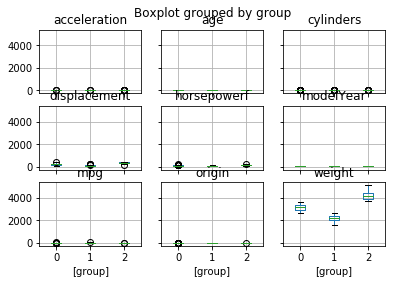

In [126]:
from sklearn.cluster import KMeans
cluster_errors = []
k=3
kmc = KMeans(n_clusters=k,random_state=1)
kmc.fit(X,Y)
print(kmc.cluster_centers_)
##print(kmc.inertia_)
##print(kmc.labels_)
##cluster_errors.append(kmc.inertia_)
##plt.plot(clusters,cluster_errors)
print(pd.Series(kmc.labels_).value_counts())
cars_df['group'] = kmc.predict(X)
cars_df.boxplot(by='group')